In [20]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import forestci as fci
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import Statistics_MT



In [3]:
## The file is opened as a Dataframe 
df = p.read_csv('/Users/vispikarkaria/Downloads/share_data_withFEA_metrics.csv')
df = df.dropna()


In [4]:
##FleetID is transformed

FleetID_transformation = np.unique(df['FleetID'])
FleetID_transformation


gle = LabelEncoder()
FleetID_labels = gle.fit_transform(df['FleetID'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

genre_mappings

df['FleetID_code'] = FleetID_labels
print(genre_mappings)

{0: '10101', 1: '10109', 2: '10112', 3: '10114', 4: '10120', 5: '10150', 6: '10151', 7: '10153', 8: '10155', 9: '10157', 10: '12005', 11: '20004', 12: '20006', 13: '20007', 14: '20019', 15: '30100', 16: '30101', 17: '30105', 18: '30241', 19: '30253', 20: '30257', 21: '30258', 22: '30301', 23: '35278', 24: '35308', 25: '35313', 26: '35404', 27: '35404_OLD', 28: '45390'}


In [5]:
##WheelPosition is transformed

WheelPosition_transformation = np.unique(df['WheelPosition'])
WheelPosition_transformation


gle = LabelEncoder()
WheelPosition_labels = gle.fit_transform(df['WheelPosition'])
genre_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

genre_mappings

df['WheelPosition_code'] = WheelPosition_labels
print(genre_mappings)

{0: '1L', 1: '1R', 2: '2LI', 3: '2LO', 4: '2RI', 5: '2RO', 6: '3LI', 7: '3LO', 8: '3RI', 9: '3RO', 10: '4LI', 11: '4LO', 12: '4RI', 13: '4RO', 14: '5LI', 15: '5LO', 16: '5RI', 17: '5RO'}


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
19343


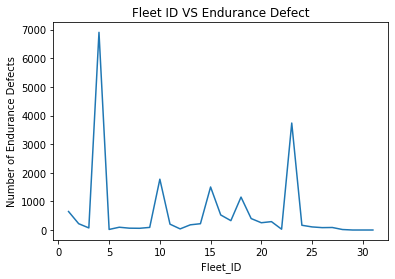

In [6]:
##Analyzing Number of Endurance defect in each fleet

MyList = df["FleetID_code"]
MyList = MyList.to_numpy()
print(np.unique(MyList))

x_array = []
y_array= []

for i in range(1,32):
    x_array.append(i)
    count1 = np.count_nonzero(MyList == i) 
    count1 = y_array.append(count1)

##Plotting Fleet ID code vs the endurance defect
plt.plot(x_array, y_array)
plt.xlabel("Fleet_ID")
plt.ylabel("Number of Endurance Defects")
plt.title("Fleet ID VS Endurance Defect")
print(len(df))

In [7]:
## Creating the train test spit in this code
X = df[['Casing_Mileage', 'Casing_Age_Days', 'td_avg', 'NC_sidewall_CVMD_AMP_mean', 'NC_summit_CVMD_AMP_mean', 'NC_ZB_CVMD_AMP_mean', 'NC_turn_CVMD_AMP_mean', 'NC_summit_maxCVMD_rev_mean', 'NC_sidewall_maxCVMD_rev_mean', 'NC_turn_maxCVMD_rev_mean', 'NC_ZB_maxCVMD_rev_mean', 'D07_SEelm_cumul', 'NC_sidewall_SEelm_cumul', 'NC_summit_SEelm_cumul', 'NC_ZB_SEelm_cumul', 'BT_SEelm_cumul', 'PS_SEelm_cumul', 'BJ_SEelm_cumul', 'BR_SEelm_cumul', 'temp_Q_cumul']]
y = df['End_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [8]:
## Combine train and test dataset

df2 = pd.concat([X_train, y_train], axis=1)
df3 = pd.concat([X_test, y_test], axis=1)
print(len(df2), len(df3))


13540 5803


In [9]:
# Balancing the train dataset

print("The length of dataframe before concat is ", len(df2))

def select_balancing_method(df2, method, number_drop):
    increase_minority = 'increase_minority'
    if method == 'increase_minority':
        duplicate_y = df2[df2['End_Flag']==1]
        for i in range(0,10):
            df2 = pd.concat([df2, duplicate_y], )
        print("The length of dataframe after concat is ", len(df2))

    elif method == 'decrease_majority': 
        duplicate_y = df2[df2['End_Flag']==0]
        index_list = df2.index[ df2['End_Flag'] == 0]
        #number_drop = int(input("Please enter the number of rows you want to delete: "))
        df2.drop(index_list[500:number_drop],0, inplace=True)
        df2.head()
        print("The length of dataframe after concat is ", len(df2))
    return df2

df2 = select_balancing_method(df2, method = 'decrease_majority', number_drop = 13000)

X_train = df2[['Casing_Mileage', 'Casing_Age_Days', 'td_avg', 'NC_sidewall_CVMD_AMP_mean', 'NC_summit_CVMD_AMP_mean', 'NC_ZB_CVMD_AMP_mean', 'NC_turn_CVMD_AMP_mean', 'NC_summit_maxCVMD_rev_mean', 'NC_sidewall_maxCVMD_rev_mean', 'NC_turn_maxCVMD_rev_mean', 'NC_ZB_maxCVMD_rev_mean', 'D07_SEelm_cumul', 'NC_sidewall_SEelm_cumul', 'NC_summit_SEelm_cumul', 'NC_ZB_SEelm_cumul', 'BT_SEelm_cumul', 'PS_SEelm_cumul', 'BJ_SEelm_cumul', 'BR_SEelm_cumul', 'temp_Q_cumul']]
y_train = df2['End_Flag']

The length of dataframe before concat is  13540
The length of dataframe after concat is  1040


In [10]:
## Running the Random forest model
clf = RandomForestClassifier(n_estimators = 500, criterion='entropy',
                                  random_state=10)

clf.fit(X_train, y_train)
print(len(X_train), len(X_test))
y_pred = clf.predict(X_test)

1040 5803


Accuracy: 0.8402550404962951
F1_score: 0.07944389275074479


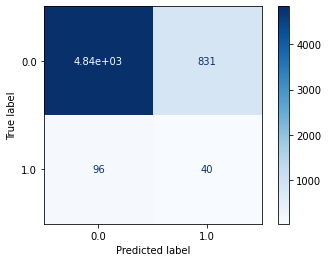

In [11]:
## Checking the metrics of Random Forest
##printing the accuracy of the model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1_score:", metrics.f1_score(y_test, y_pred))

#Printing the confusion matrix
disp = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", values_format='.3g')


In [12]:
## Get the classification report

X_test_numpy = X_test.to_numpy()
print(X_test_numpy[1,:])
print(metrics.classification_report(y_test, y_pred))

[ 8.07220000e+04  2.66000000e+02  1.30000000e+01  4.75093401e-03
  9.82087540e-04  2.17913487e-03  1.90018021e-03  8.79218926e-05
 -1.03586984e-02  4.59467190e-02 -6.19460464e-03  1.81108934e+04
  2.64252486e+02  1.06103915e+02  8.42672296e+02  1.54525850e+04
  1.65136211e+04  4.72510409e+04  4.53561221e+04  3.14458266e+02]
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      5667
         1.0       0.05      0.29      0.08       136

    accuracy                           0.84      5803
   macro avg       0.51      0.57      0.50      5803
weighted avg       0.96      0.84      0.89      5803



[0.06056553 0.06793232 0.06111915 0.0347562  0.03466284 0.03485721
 0.03742559 0.03356369 0.03705633 0.03266971 0.03489351 0.05409285
 0.05980013 0.06287435 0.05932018 0.05870872 0.05626799 0.05999007
 0.05467055 0.06477308]


Text(0.5, 1.0, 'Importance of Various Input Parameters')

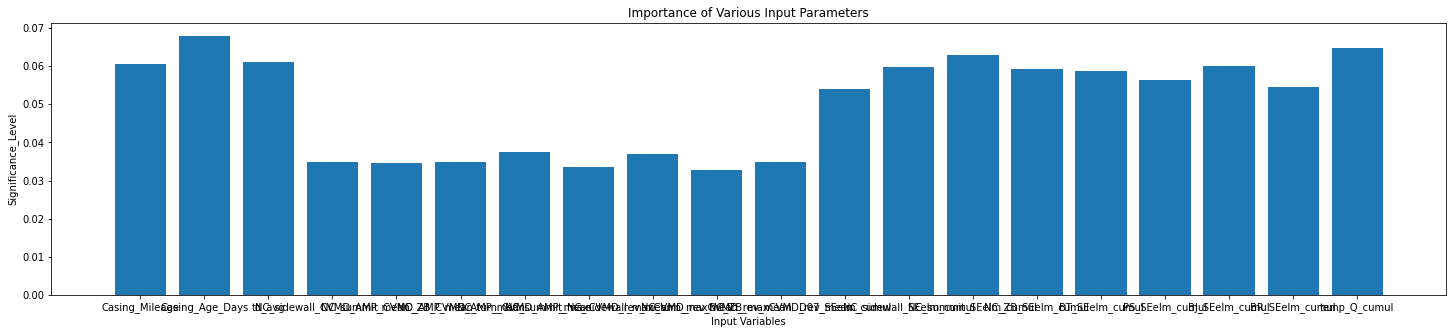

In [13]:
## Check the sensitivity of each variable

importance = clf.feature_importances_
print(importance)
plt.figure(figsize=(25, 5))
X_importance = ['Casing_Mileage', 'Casing_Age_Days', 'td_avg', 'NC_sidewall_CVMD_AMP_mean', 'NC_summit_CVMD_AMP_mean', 'NC_ZB_CVMD_AMP_mean', 'NC_turn_CVMD_AMP_mean', 'NC_summit_maxCVMD_rev_mean', 'NC_sidewall_maxCVMD_rev_mean', 'NC_turn_maxCVMD_rev_mean', 'NC_ZB_maxCVMD_rev_mean', 'D07_SEelm_cumul', 'NC_sidewall_SEelm_cumul', 'NC_summit_SEelm_cumul', 'NC_ZB_SEelm_cumul', 'BT_SEelm_cumul', 'PS_SEelm_cumul', 'BJ_SEelm_cumul', 'BR_SEelm_cumul', 'temp_Q_cumul']
plt.bar(X_importance, importance)
plt.ylabel("Significance_Level")
plt.xlabel("Input Variables")
plt.title("Importance of Various Input Parameters")

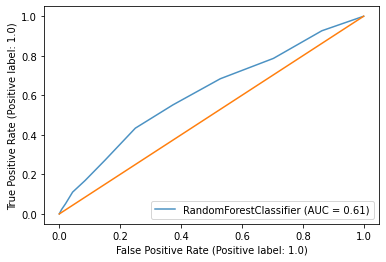

In [14]:
## Plotting SVC vs Random forest ROC plot 
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
x_axis1 = np.linspace(0,1,10)
plt.plot(x_axis1, x_axis1)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [15]:
# Calculating the Variance

Defect_Variance = fci.random_forest_error(clf, X_train,
                                             X_test)
print(Defect_Variance)

[0.02517477 0.03503337 0.03049044 ... 0.03405548 0.01999813 0.02764761]


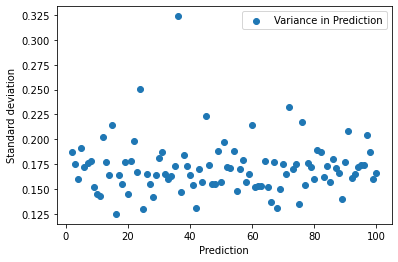

In [16]:
# Plot variance for better understanding
x_Scale = np.linspace(1,2113,2113)

fig, ax = plt.subplots(1)
ax.scatter(x_Scale[1:100],
           np.sqrt(Defect_Variance[1:100]),
           label='Variance in Prediction')



ax.set_xlabel('Prediction')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()

In [22]:
# calculating confidence interval
import scipy
def conf_int(mean, variance, confidence):
    upper_bound_array = []
    lower_bound_array = []
    st_dev = np.sqrt(variance)
    n = int(len(mean))
    count = 0
    for x in range(0, n):
        h = (st_dev[x]*scipy.stats.t.ppf((1-confidence)/2., n-1))/2
        upper_bound = float(mean[x])+float(h)
        lower_bound = float(mean[x])-float(h)
        #print(upper_bound, lower_bound)
        upper_bound_array.append(upper_bound)
        lower_bound_array.append(lower_bound)
        count = count + 1
    
    
    return upper_bound_array, mean, lower_bound_array, count


y_pred = clf.predict_proba(X_test)
y_pred = y_pred[:,1]
print(len(y_pred), len(Defect_Variance))
Defect_Variance = fci.random_forest_error(clf, X_train,
                                             X_test)
y_ub, y, y_lb, c = conf_int(y_pred, Defect_Variance, 0.95)





5803 5803


In [ ]:
array_defect_miles = []
space_range = np.linspace(0, 1000000, 1000)
np.shape((space_range))
X_cont_array = []
Total_miles = 700000
for miles in space_range: 
    if miles<Total_miles/3:
        X_cont = [0.00000000e+00, 0.00000000e+00, miles, miles,
        0, 0, 0.00000000e+00, 0.00000000e+00,
        90.025644, 1e-4*miles, miles, 4.00000000e+00,
        1e3*miles]
    
    elif miles >=Total_miles/3 and miles < (Total_miles*2)/3:
        X_cont = [1.00000000e+00, 0.00000000e+00, miles, miles,
        0, 0, 0.00000000e+00, 0.00000000e+00,
        90.025644, 1e-4*miles, miles, 4.00000000e+00,
        1e5*miles]    

    elif miles >=(Total_miles*2)/3:
        X_cont = [2.00000000e+00, 1.00000000e+00, miles, miles,
        0, 0, 0.00000000e+00, 1.00000000e+00,
        90, 1e-3*miles, miles, 4.00000000e+00,
        1e7*miles]    



    X_cont = np.reshape(X_cont, [1,-1])
    X_cont_answer = clf.predict_proba(X_cont)
    X_answer = X_cont_answer[:,1]
    array_defect_miles.append(X_answer)
    X_cont = X_cont.flatten()
    X_cont_array.append(X_cont)

In [23]:
df.describe()

,Casing_Mileage,Casing_Age_Days,td_avg,NC_sidewall_CVMD_AMP_mean,NC_sidewall_CVMD_AMP_mean_std,NC_summit_CVMD_AMP_mean,NC_summit_CVMD_AMP_mean_std,NC_ZB_CVMD_AMP_mean,NC_ZB_CVMD_AMP_mean_std,NC_turn_CVMD_AMP_mean,...,NC_summit_SEelm_cumul,NC_ZB_SEelm_cumul,BT_SEelm_cumul,PS_SEelm_cumul,BJ_SEelm_cumul,BR_SEelm_cumul,temp_Q_cumul,End_Flag,FleetID_code,WheelPosition_code
count,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,...,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000
mean,234991.908300,619.804477,13.540014,0.004490,0.000238,0.000988,0.000014,0.002039,0.000132,0.001946,...,322.034580,2570.128375,48269.395164,51496.317910,137968.950258,138833.028419,1759.661491,0.025074,11.971618,5.853590
std,149280.127166,431.956015,5.168694,0.000421,0.000128,0.000010,0.000006,0.000248,0.000076,0.000056,...,204.018862,1650.277572,30914.699302,33345.321915,87450.873441,88318.818451,2444.023100,0.156353,8.015119,4.571774
min,1.000000,1.000000,1.000000,0.003860,0.000002,0.000966,0.000003,0.001683,0.000001,0.001813,...,0.001207,0.011034,0.198663,0.225141,0.576617,0.558405,-1539.684028,0.000000,0.000000,0.000000
25%,117126.570000,267.000000,9.354312,0.003985,0.000136,0.000982,0.000010,0.001748,0.000072,0.001907,...,158.208902,1267.287348,23752.928342,25149.371977,68779.327998,68647.257903,474.716974,0.000000,4.000000,2.000000
50%,210030.854452,519.000000,13.133832,0.004621,0.000270,0.000987,0.000014,0.002092,0.000146,0.001950,...,288.435056,2288.931103,43046.778842,45681.417784,123756.982711,124377.731577,1076.639825,0.000000,10.000000,5.000000
75%,329984.760000,897.000000,17.475000,0.004766,0.000326,0.000995,0.000017,0.002198,0.000184,0.001983,...,453.698299,3609.705515,67916.903076,72454.146919,193992.339224,195083.544566,2018.535944,0.000000,19.000000,9.000000
max,888544.400000,2191.000000,26.500000,0.006462,0.000890,0.001010,0.000031,0.003297,0.000555,0.002060,...,1249.920187,9951.322697,187165.603310,202720.382456,522868.176390,534075.543620,34580.378762,1.000000,28.000000,17.000000
